## STATS 507 HW9 Algorithm Design and Analysis

### Problem 1 Implementing a Basic Data Structure (6 points)

#### 1. Define a class called a __`Trie`__, which supports the following methods:    

   * `__init__(self)` : takes no arguments. Initializes an empty dictionary called `root` as the only instance attribute of the `Trie` object. This dictionary will serve as the data structure described in the previous paragraph.  
   * `add(self,s)` : takes a string `s` as its only argument. Adds `s` to the trie represented by `self.root` according to the procedure described in the paragraph above.  
   * `contains(self,s)` : takes a string `s` as its only argument and returns a boolean, which is True if and only if the string `s` is represented in the `trie`.  
   * ` __repr__(self)` : takes no arguments. Returns a string representing the object. When you try to print an object, Python calls this method (if it exists).
See https://docs.python.org/3.6/reference/datamodel.html#object.__repr__ for more information.  
In our case, let’s just say that calling the `Trie.__repr__` method just returns the string representation of the dictionary, which you’ll recall is stored as `self.root`.

   Give the end-character symbol ’’ the value `None`  
   You are of course free to implement methods additional to these if you wish.   
   __Hint__: you may find it helpful to write a “helper” method for use in the contains method, that takes a string and a dictionary as its two arguments, say, `contains_helper(s,d)`.  
   If the first character of the string is not in the dictionary, you can safely return False.
   If the first character is in the dictionary, we can recurse, `contains_helper(s[1:],d[s[0]])`.   
   Be careful of the base case, where s is the empty string!  
   A similar trick will also help with the `add` method.  
  

In [161]:
class Trie():
    
    # initialize empty dictionary
    def __init__(self):
        self.root = dict()

    # return string of object (dictionary)
    def __repr__(self):
        return repr(self.root)
    
    # check if s contains in dictionary
    def contains(self, s):
        def contains_helper(s, node):

            # first char not in node
            if len(s) == 0:
                return s in node
            
            if s[0] not in node:
                return False
            else:
                return contains_helper(s[1:], node[s[0]])
        return contains_helper(s, self.root)
        
    
    # add s to dic
    def add(self, s):
        if self.contains(s):
            return
        def add_helper(s, node):
            # base case
            if len(s) == 0:
                node[''] = None
                return 
            # add keys
            if s[0] not in node:
                node[s[0]] = {}
            return add_helper(s[1:], node[s[0]])
        return add_helper(s, self.root)


In [162]:
my_trie = Trie()
my_trie.add('head')
my_trie.add('hi')
my_trie.add('howdy')
my_trie.add('cat')
my_trie.add('hcat')
my_trie.add('hid')
my_trie.add('phase')


print(my_trie.contains("hi"))
print(my_trie.contains("how"))
print(my_trie.contains("head"))
print(my_trie.contains("hcat"))
print(my_trie.contains("phase"))
my_trie.__repr__

True
False
True
True
True


<bound method Trie.__repr__ of {'h': {'e': {'a': {'d': {'': None}}}, 'i': {'': None, 'd': {'': None}}, 'o': {'w': {'d': {'y': {'': None}}}}, 'c': {'a': {'t': {'': None}}}}, 'c': {'a': {'t': {'': None}}}, 'p': {'h': {'a': {'s': {'e': {'': None}}}}}}>

In [163]:
my_trie = Trie()
my_trie.add('cat')
my_trie.add('car')
my_trie.add('dog')
my_trie.add('cog')
my_trie.add('dart')
my_trie.add('do')

print(my_trie.contains("d"))
print(my_trie.contains("cat"))
print(my_trie.contains("don"))
print(my_trie.contains("do"))
print(my_trie.contains("catz"))
print(my_trie.contains("c"))

my_trie.__repr__

False
True
False
True
False
False


<bound method Trie.__repr__ of {'c': {'a': {'t': {'': None}, 'r': {'': None}}, 'o': {'g': {'': None}}}, 'd': {'o': {'g': {'': None}, '': None}, 'a': {'r': {'t': {'': None}}}}}>

#### 2. Write a function called `wordlist2trie` :
* takes a `list` of strings as input 
* returns a `Trie` object representing the collection of strings in the input list. 
* Your function should perform __error checking__ to verify that the input is indeed a `list` and that all its elements are `strings`. 
* Note that we could just as well have implemented a method in the `Trie` class to do this, if we wanted.

In [133]:
def wordlist2trie(l):
    my_trie = Trie()
    if type(l) != list:
        raise TypeError("input not list")
    for i in l:
        if type(i) != str:
            raise TypeError("elements not string")
        else:
            my_trie.add(i)
    
    return my_trie

In [134]:
l = ['cat', 'dog', 'car', 'cog', 'dart', 'do']
wordlist2trie(l)

{'c': {'a': {'t': {'': None}, 'r': {'': None}}, 'o': {'g': {'': None}}}, 'd': {'o': {'g': {'': None}, '': None}, 'a': {'r': {'t': {'': None}}}}}

In [135]:
type(wordlist2trie(l))

__main__.Trie

#### 3.  Use `wordlist2trie` to build a trie representing the words in the word list:
* Download the word list from http://www.greenteapress.com/thinkpython/code/words.txt (or read it directly using urlib or requests)
* Save the result in a variable called __`big_trie`__


In [136]:
import urllib.request
with urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt") as response:
    txt = response.read()
words = txt.decode('utf-8').splitlines()
len(words)

113809

In [137]:
words[:10]

['aa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aardvark']

In [138]:
words[113800:]

['zymogenes',
 'zymogens',
 'zymologies',
 'zymology',
 'zymoses',
 'zymosis',
 'zymotic',
 'zymurgies',
 'zymurgy']

In [139]:
big_trie = wordlist2trie(words)

In [140]:
print(big_trie.contains('aa'))
print(big_trie.contains('abc'))
print(big_trie.contains('zymogenes'))
print(big_trie.contains('zymzu'))

True
False
True
False


### Problem 2 Comparing Sorting Algorithms  (4 points)
A point that we touched upon in lecture is the distinction between worst-case and average-case run time. That is, an algorithm may require, say, $O(n)$ time to run on most inputs, but certain inputs require, say, $O(n^{2})$ time. In this problem, you’ll see an illustration of this phenomenon in the context of sorting algorithms.

We are going to compare the performance of three popular sorting algorithms: merge sort, quicksort and bubble sort. Their respective Wikipedia pages, each of which includes pseudocode, which you are free to consult.  
Some of these pages display pseudocode for multiple variants of the algorithms (e.g., implementing certain small optimizations).   
You are not required to implement any of these speedups, but you are welcome to do so if you wish.   
You are free, if you wish, to simply copy the implementation of quicksort from the lecture slides. 

__Note__: looking up solutions to this problem from any resource other than these Wikipedia pages and the course materials will be considered academic misconduct and will be referred to Rackham’s academic integrity office accordingly.  
                               https://en.wikipedia.org/wiki/Merge_sort  
                               https://en.wikipedia.org/wiki/Quicksort  
                               https://en.wikipedia.org/wiki/Bubble_sort  


#### 1. Implement functions called `mergesort`, `quicksort` and `bubblesort`:
* Each of which takes as input a `list` of numbers (ints and/or floats) and returns the `list` with elements sorts in non-decreasing order. 
* Your sorting functions should perform __error checking__ to ensure that the input is a `list` and that the elements of the list are all numeric (i.e., `ints` and/or `floats`). 
* Your __`quicksort`__ should use the last element of the input list as the pivot.

__Merge sort__: pseudocode from wiki

    function merge_sort(list m)
        // Base case. A list of zero or one elements is sorted, by definition.
        if length of m ≤ 1 then
            return m

        // Recursive case. First, divide the list into equal-sized sublists
        // consisting of the first half and second half of the list.
        // This assumes lists start at index 0.
        var left := empty list
        var right := empty list
        for each x with index i in m do
            if i < (length of m)/2 then
                add x to left
            else
                add x to right

        // Recursively sort both sublists.
        left := merge_sort(left)
        right := merge_sort(right)

        // Then merge the now-sorted sublists.
        return merge(left, right)

    function merge(left, right)
        var result := empty list

        while left is not empty and right is not empty do
            if first(left) ≤ first(right) then
                append first(left) to result
                left := rest(left)
            else
                append first(right) to result
                right := rest(right)

        // Either left or right may have elements left; consume them.
        // (Only one of the following loops will actually be entered.)
        while left is not empty do
            append first(left) to result
            left := rest(left)
        while right is not empty do
            append first(right) to result
            right := rest(right)
        return result

In [141]:
def mergesort(m):
    
    # error check
    if type(m) != list:
        raise TypeError("input not list")
    for i in m:
        if not (type(i) == int or type(i) == float):
            raise TypeError("element not int or float")
    
    # create sublist
    if len(m) <= 1:
        return m
    
    (merge,left,right) = (list(),list(),list())

    for i in range(len(m)):
        if i < int(len(m)/2):
            left.append(m[i])
        else:
            right.append(m[i])
    
    # recursive 
    left_update = mergesort(left)
    right_update = mergesort(right) 
    
    # merge
    while (len(left_update) >= 1) and (len(right_update) >= 1):
        if left_update[0] < right_update[0]:
            merge.append(left_update[0])
            left_update.remove(left_update[0])
        else:
            merge.append(right_update[0])
            right_update.remove(right_update[0])
    
    
    merge += (left_update + right_update)
    return merge


In [142]:
mergesort([3,5,2,1,3])

[1, 2, 3, 3, 5]

In [143]:
mergesort([18, 2, 6, 0, 0, 278, 5, 87, 100])

[0, 0, 2, 5, 6, 18, 87, 100, 278]

__bubble sort__: pseudocode from wiki

    procedure bubbleSort( A : list of sortable items )
        n = length(A)
        repeat
            newn = 0
            for i = 1 to n-1 inclusive do
                if A[i] > A[i+1] then
                    swap(A[i], A[i+1])
                    newn = i
                end if
            end for
            n = newn
        until n <= 1
    end procedure

In [144]:
def bubblesort(m):
    # error check
    if type(m) != list:
        raise TypeError("input not list")
    for i in m:
        if not (type(i) == int or type(i) == float):
            raise TypeError("element not int or float")
    
    # bubble sort: compare one by one
    n = len(m)
    while n > 1:
        new_n = 0
        for i in range(0, len(m)-1):
            if m[i] > m[i+1]:
                m[i], m[i+1] = m[i+1], m[i]
                new_n = i
        #print(m)
        n = new_n
        
    return m

In [145]:
bubblesort([18, 2, 6, 0, 0, 278, 5, 87, 100])

[0, 0, 2, 5, 6, 18, 87, 100, 278]

In [146]:
bubblesort([2,1,4,7,3])

[1, 2, 3, 4, 7]

#### Quick sort: 
Code adapted from lecture notes

In [147]:
def quicksort(t):
    
    # error check:
    if type(t) != list:
        raise TypeError("input not list")
    for i in t:
        if not (type(i) == int or type(i) == float):
            raise TypeError("element not int or float")
    
    # only one element
    if len(t) <= 1:
        return t
    # quick sort using last element of the input list as the pivot
    (less,mid,more) = (list(),list(),list())
    pivot = t[len(t)-1]
    mid.append(pivot)
    for i in range(0,len(t)-1):
        if t[i] == pivot:
            mid.append(t[i])
        elif t[i] < pivot:
            less.append(t[i])
        else: # t[i] > pivot
            more.append(t[i])

    return quicksort(less) + mid + quicksort(more)

In [148]:
quicksort([2,1,4,7,3])

[1, 2, 3, 4, 7]

In [149]:
quicksort([18, 2, 6, 0, 0, 278, 5, 87, 100])

[0, 0, 2, 5, 6, 18, 87, 100, 278]

__2. Write a function called `run_timing_expt`__:
   * takes a list of numbers (ints and/or floats) as its only input. (error check)
   * Calling this function should run each of the three sorting algorithms implemented in the previous subproblem on the given list, timing each call. 
   * The function should return a tuple of floats `(t_merge,t_quick,t_bubble)` corresponding to the times that it took to sort the input list with merge sort, quicksort and bubble sort, respectively.

   * The Wikipedia page on sorting algorithms includes information about best-, average- and worst-case runtimes for a number of sorting algorithms: https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms. 
   * Note that our three algorithms differ in some of these. For example, merge sort and quicksort both have $O(n\log n)$ average-case runtime, while bubble sort is $O(n^{2})$ runtime in both the average and worst case. 

In [150]:
import time
start_time = time.time()
quicksort([18, 2, 6, 0, 0, 278, 5, 87, 100])
end_time = time.time() - start_time
end_time

7.510185241699219e-05

In [151]:
def run_timing_expt(l):
     # error check:
    if type(l) != list:
        raise TypeError("input not list")
    for i in l:
        if not (type(i) == int or type(i) == float):
            raise TypeError("element not int or float")
    
    # merge sort
    merge_start = time.time()
    mergesort(l)
    t_merge = time.time() - merge_start
    
    # quick sort
    quick_start = time.time()
    quicksort(l)
    t_quick = time.time() - quick_start
    
    # bubble sort
    bubble_start = time.time()
    bubblesort(l)
    t_bubble = time.time() - bubble_start
    
    return (t_merge, t_quick, t_bubble)

In [152]:
run_timing_expt([18, 2, 6, 0, 0, 278, 5, 87, 100])

(4.100799560546875e-05, 1.7881393432617188e-05, 9.298324584960938e-06)

__3. Make a plot that shows the average runtime of the three sorting algorithms as a function of the input size n__: 
   * Now, we will use the functions defined in the previous two subproblems to explore the behavior of these three sorting algorithms on different kinds of input lists. 
   * First, let’s see what happens when we pass an already-sorted list. For n = 500,1000,1500,2000,2500, call `run_timing_expt(list(range(n)))` twenty times. 

   * Please include error bars in your plot indicating 2 standard errors (2SE) of the mean. 
   * Give your plot an appropriate title, and label the axes. 
   * Save your plot as __ascending.pdf__ and include it in your submission. 
   * __Note__: if you call `quicksort` on an already-sorted list of size much larger than 2500 you will encounter a recursion depth error (assuming that you are running with the default maximum recursion depth of 5000). Why is this the case? Under more realistic conditions, this would cause quicksort to be slow. In this case, it simply causes quicksort to be unusable for even moderately large inputs.

In [153]:
import time
import numpy as np
size = [500, 1000, 1500, 2000, 2500]

(merge_mean, quick_mean, bubble_mean) = (list(), list(), list())
(merge_2se, quick_2se, bubble_2se) = (list(), list(), list())

for n in size:
    (merge, quick, bubble) = (list(), list(), list())
    for i in range(20):
        merge.append(run_timing_expt(list(range(n)))[0])
        quick.append(run_timing_expt(list(range(n)))[1])
        bubble.append(run_timing_expt(list(range(n)))[2])
        
    merge_mean.append(np.mean(merge))
    merge_2se.append(2*np.std(merge)/np.sqrt(20))
    quick_mean.append(np.mean(quick))
    quick_2se.append(2*np.std(quick)/np.sqrt(20))
    bubble_mean.append(np.mean(bubble))
    bubble_2se.append(2*np.std(bubble)/np.sqrt(20))
    

In [154]:
print(merge_mean)
print(quick_mean)
print(bubble_mean)

[0.003580164909362793, 0.008352887630462647, 0.012412571907043457, 0.016753411293029784, 0.021007454395294188]
[0.036772310733795166, 0.14332914352416992, 0.31928640604019165, 0.5316968083381652, 0.8515040159225464]
[9.881258010864258e-05, 0.00021055936813354492, 0.00030291080474853516, 0.00037511587142944334, 0.000462496280670166]


In [155]:
print(merge_2se)
print(quick_2se)
print(bubble_2se)

[0.0001008523671536562, 0.0005635483270597367, 0.0005671055985603477, 0.0006669723200420904, 0.00021284020963627226]
[0.0019760831461477246, 0.0072330621534830485, 0.015019114352368936, 0.002616497784202689, 0.01672594206004798]
[9.29462377553594e-06, 2.7768821319212313e-05, 2.4054355172299002e-05, 1.0972191642698783e-05, 6.238669852845155e-06]


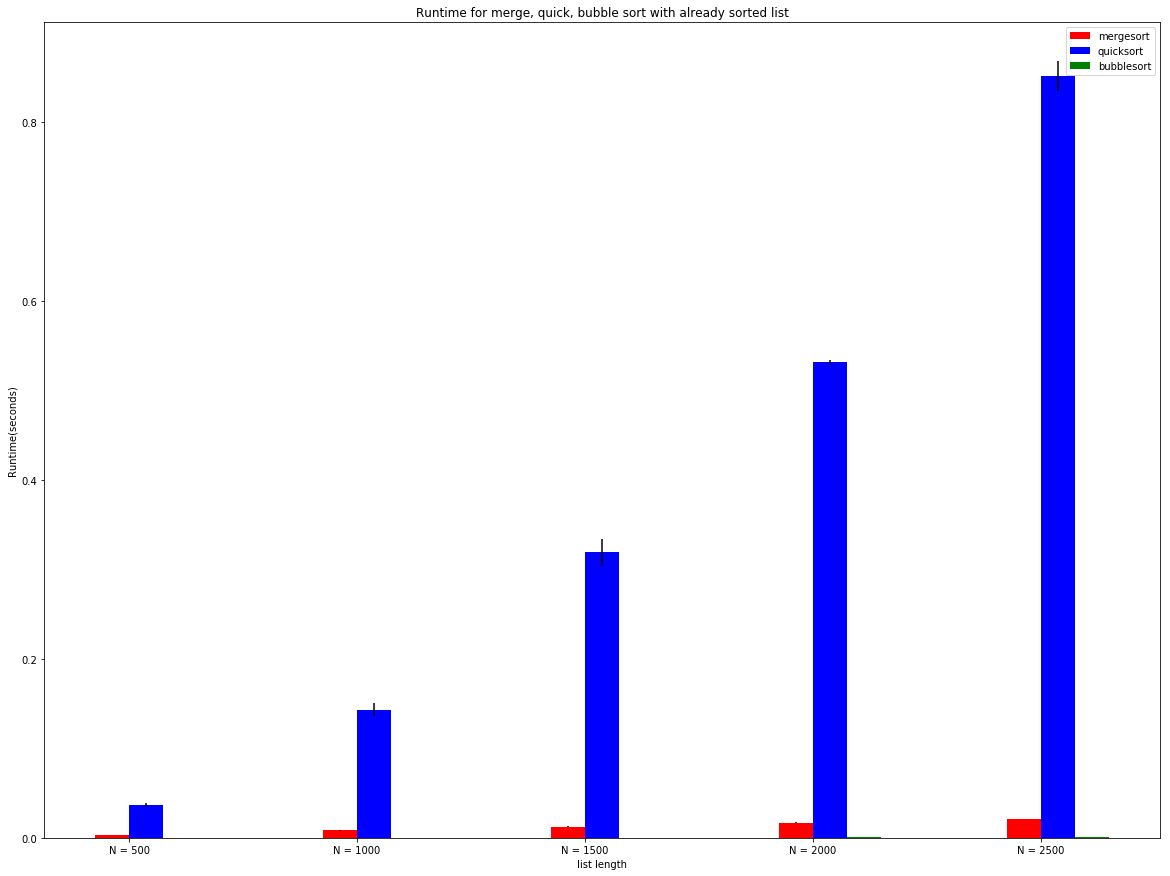

In [156]:
import matplotlib.pyplot as plt   
# the x locations for the groups
g1 = np.arange(5)
width = 0.15 
g2 = [x + width for x in g1]
g3 = [x + width for x in g2]

fig, ax = plt.subplots(figsize=(20,15))
merge = ax.bar(g1, tuple(merge_mean), width, yerr = tuple(merge_2se), color='r')
quick = ax.bar(g2, tuple(quick_mean), width, yerr = tuple(quick_2se), color='b')
bubble = ax.bar(g3, tuple(bubble_mean), width, yerr = tuple(bubble_2se), color='g')

ax.set_title('Runtime for merge, quick, bubble sort with already sorted list')
ax.set_xticks(g1 + width / 2)
ax.set_xticklabels(('N = 500', 'N = 1000', 'N = 1500', 'N = 2000', 'N = 2500'))
ax.set_xlabel('list length')
ax.set_ylabel('Runtime(seconds)')
ax.legend((merge[0], quick[0], bubble[0]), ('mergesort', 'quicksort', 'bubblesort'))
fig.savefig('ascending.pdf', bbox_inches="tight")

__4. Run the same experiment, but this time with the input being a list sorted in descending order.__ 
 * That is, you should run twenty trials of `run_timing_expt(sorted(list(range(n)), reverse=True))` for n = 500, 1000, 1500, 2000, 2500. 

 * Again make a plot summarizing the results and including an appropriate title and axis labels. 
 * Please include error bars in your plot indicating 2 standard errors of the mean. 
 * Save your plot as __descending.pdf__ and include it in your submission.

In [157]:
times = [500, 1000, 1500, 2000, 2500]

(merge_mean, quick_mean, bubble_mean) = (list(), list(), list())
(merge_2se, quick_2se, bubble_2se) = (list(), list(), list())

for n in times:
    (merge, quick, bubble) = (list(), list(), list())
    for i in range(20):
        merge.append(run_timing_expt(sorted(list(range(n)), reverse=True))[0])
        quick.append(run_timing_expt(sorted(list(range(n)), reverse=True))[1])
        bubble.append(run_timing_expt(sorted(list(range(n)), reverse=True))[2])
        
    merge_mean.append(np.mean(merge))
    merge_2se.append(2*np.std(merge)/np.sqrt(20))
    quick_mean.append(np.mean(quick))
    quick_2se.append(2*np.std(quick)/np.sqrt(20))
    bubble_mean.append(np.mean(bubble))
    bubble_2se.append(2*np.std(bubble)/np.sqrt(20))
    

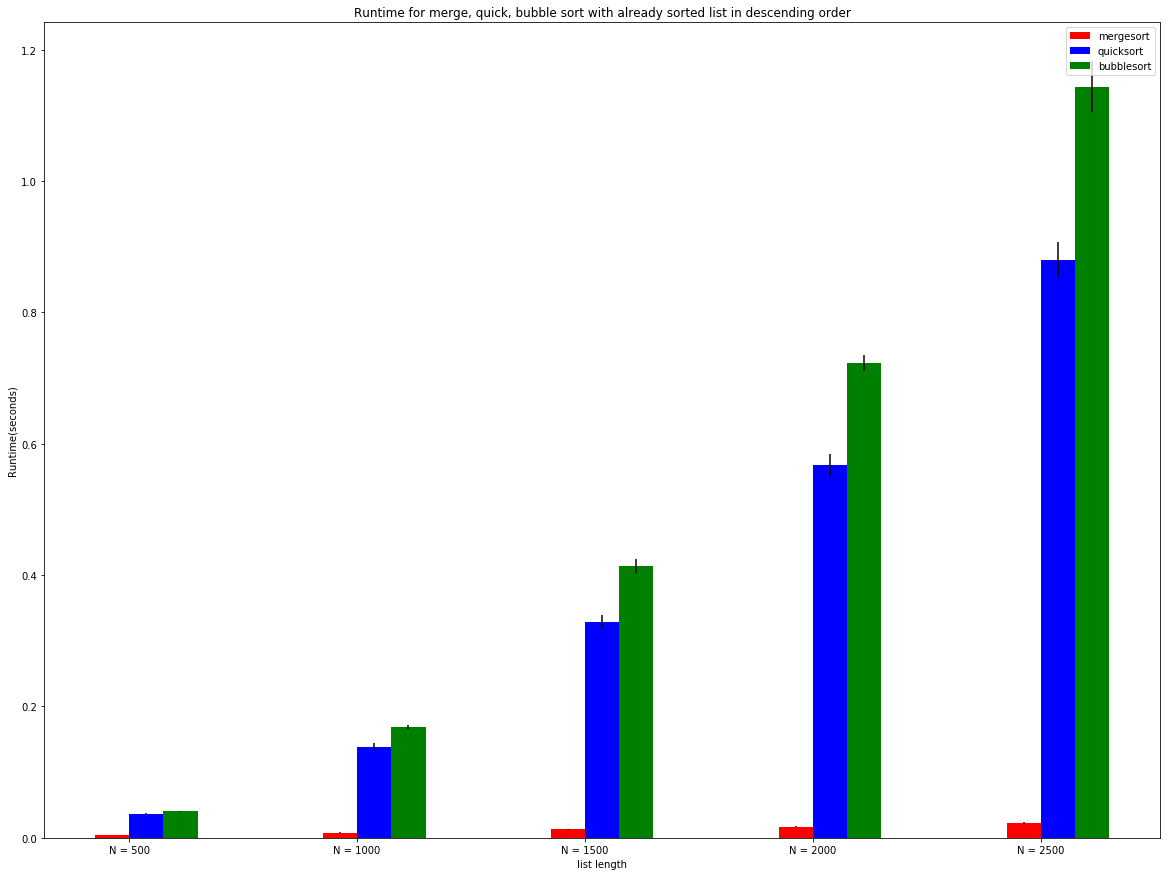

In [158]:
# the x locations for the groups
g1 = np.arange(5)
width = 0.15 
g2 = [x + width for x in g1]
g3 = [x + width for x in g2]

fig, ax = plt.subplots(figsize=(20,15))
merge = ax.bar(g1, tuple(merge_mean), width, yerr = tuple(merge_2se), color='r')
quick = ax.bar(g2, tuple(quick_mean), width, yerr = tuple(quick_2se), color='b')
bubble = ax.bar(g3, tuple(bubble_mean), width, yerr = tuple(bubble_2se), color='g')

ax.set_title('Runtime for merge, quick, bubble sort with already sorted list in descending order')
ax.set_xticks(g1 + width / 2)
ax.set_xticklabels(('N = 500', 'N = 1000', 'N = 1500', 'N = 2000', 'N = 2500'))
ax.set_xlabel('list length')
ax.set_ylabel('Runtime(seconds)')
ax.legend((merge[0], quick[0], bubble[0]), ('mergesort', 'quicksort', 'bubblesort'))
fig.savefig('descending.pdf', bbox_inches="tight")

__5. Run the same experiment, but this time on random inputs.__ 
  * That is, for each value of n in the previous subproblem, run 20 independent trials of `run_timing_expt([random.random() for _ in range(n)])`
  * Again make a plot summarizing the results and including an appropriate title and axis labels. 
  * Please include error bars in your plot indicating 2 standard errors of the mean. 
  * Save your plot as __random.pdf__ and include it in your submission.

In [159]:
import random
times = [500, 1000, 1500, 2000, 2500]

(merge_mean, quick_mean, bubble_mean) = (list(), list(), list())
(merge_2se, quick_2se, bubble_2se) = (list(), list(), list())

for n in times:
    (merge, quick, bubble) = (list(), list(), list())
    for i in range(20):
        merge.append(run_timing_expt([random.random() for _ in range(n)])[0])
        quick.append(run_timing_expt([random.random() for _ in range(n)])[1])
        bubble.append(run_timing_expt([random.random() for _ in range(n)])[2])
        
    merge_mean.append(np.mean(merge))
    merge_2se.append(2*np.std(merge)/np.sqrt(20))
    quick_mean.append(np.mean(quick))
    quick_2se.append(2*np.std(quick)/np.sqrt(20))
    bubble_mean.append(np.mean(bubble))
    bubble_2se.append(2*np.std(bubble)/np.sqrt(20))
    

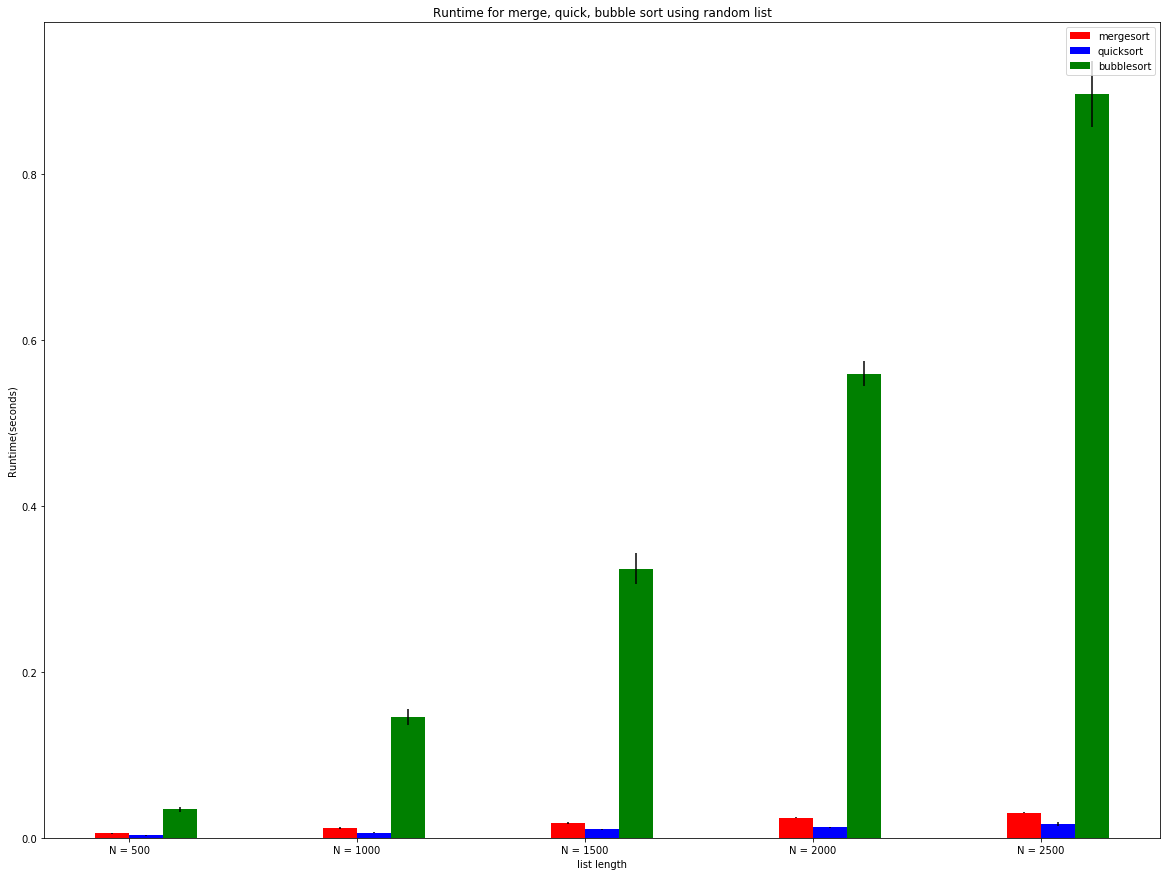

In [160]:
# the x locations for the groups
g1 = np.arange(5)
width = 0.15 
g2 = [x + width for x in g1]
g3 = [x + width for x in g2]

fig, ax = plt.subplots(figsize=(20,15))
merge = ax.bar(g1, tuple(merge_mean), width, yerr = tuple(merge_2se), color='r')
quick = ax.bar(g2, tuple(quick_mean), width, yerr = tuple(quick_2se), color='b')
bubble = ax.bar(g3, tuple(bubble_mean), width, yerr = tuple(bubble_2se), color='g')

ax.set_title('Runtime for merge, quick, bubble sort using random list')
ax.set_xticks(g1 + width / 2)
ax.set_xticklabels(('N = 500', 'N = 1000', 'N = 1500', 'N = 2000', 'N = 2500'))
ax.set_xlabel('list length')
ax.set_ylabel('Runtime(seconds)')
ax.legend((merge[0], quick[0], bubble[0]), ('mergesort', 'quicksort', 'bubblesort'))
fig.savefig('random.pdf', bbox_inches="tight")